In [5]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [3]:
# https://www.pewresearch.org/internet/2020/07/28/parenting-children-in-the-age-of-screens/
# "I am ____ confident in my ability to know how much screen time is appropriate for my child."

parent_responses = Table().with_columns(
    'How confident', make_array('Not too / not at all', 'Somewhat', 'Very'),
    'Percent', make_array(16, 45, 39)
)
parent_responses

How confident,Percent
Not too / not at all,16
Somewhat,45
Very,39


In [7]:
# Verifying this is a Distribution
sum(parent_responses.column("Percent"))

100

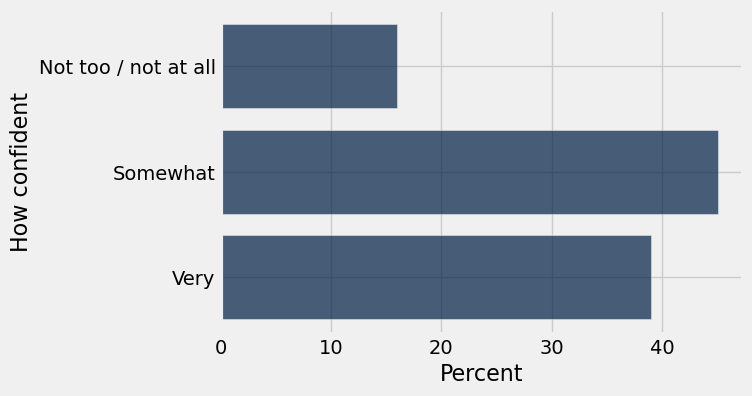

In [9]:
# Bar Chart
parent_responses.barh('How confident', 'Percent')

## Categorical Distribution: Finding the Counts ##

In [10]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [12]:
# Select Studios Column
studios = top_movies.select("Studio")
studios.show(4)

Studio
MGM
Fox
Fox
Universal


In [13]:
# Create Distribution Table
studio_distribution = studios.group("Studio")
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [14]:
# Verifying this is a Distribution
sum(studio_distribution.column("count"))

200

AttributeError: 'NoneType' object has no attribute 'sort'

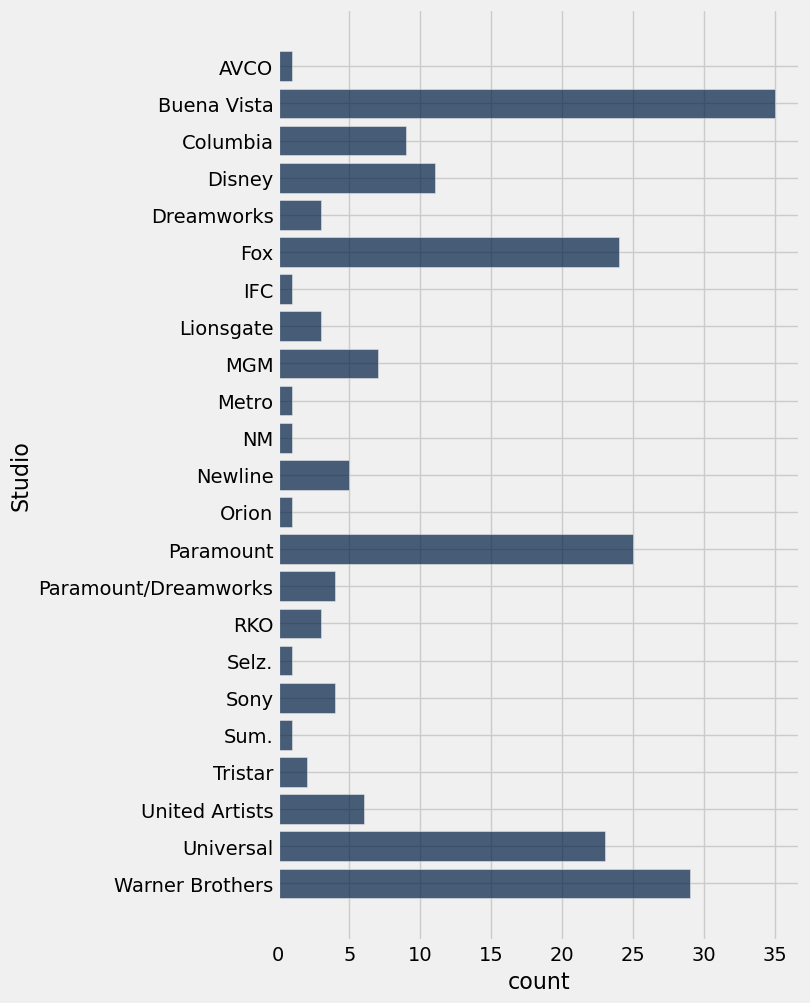

In [19]:
# Bar Chart
studio_distribution.barh('Studio').sort("count", descending=True)

In [16]:
# Better Bar Chart
...

## Distribution of a Quantitative Variable ##

In [20]:
ages = 2021 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [21]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,82
Star Wars,Fox,460998007,1583483200,1977,44
The Sound of Music,Fox,158671368,1266072700,1965,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,39
Titanic,Paramount,658672302,1204368000,1997,24
The Ten Commandments,Paramount,65500000,1164590000,1956,65
Jaws,Universal,260000000,1138620700,1975,46
Doctor Zhivago,MGM,111721910,1103564200,1965,56
The Exorcist,Warner Brothers,232906145,983226600,1973,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,84


## Finding the Counts: Binning ##

In [22]:
min(ages), max(ages)

(4, 100)

In [24]:
equal_bins = top_movies.bin('Age', bins = np.arange(0, 101, 20))
equal_bins

bin,Age count
0,67
20,60
40,46
60,21
80,6
100,0


In [25]:
sum(equal_bins.column('Age count'))

200

In [27]:
# All bins except the last are of the form [a, b)
# Verify [40, 60) bin above is accurate
top_movies.where("Age", are.above_or_equal_to(40)).where('Age', are.below(60)).num_rows

46

In [39]:
top_movies.where('Age', 100)

Title,Studio,Gross,Gross (Adjusted),Year,Age
The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921,100


In [40]:
# The last bin is NOT [80, 100)
top_movies.where(
    'Age', are.above_or_equal_to(80)).where(
    'Age', are.below(100)).num_rows

5

In [28]:
# Instead, it is [80, 100]
top_movies.where(
    'Age', are.above_or_equal_to(80)).where(
    'Age', are.below_or_equal_to(100)).num_rows

6

In [29]:
my_bins = make_array(0, 10, 20, 40, 60, 100)

In [31]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,28
10,39
20,60
40,46
60,27
100,0


In [32]:
sum(binned_data.column('Age count'))

200

In [41]:
# The last bin is [60, 100]
top_movies.where(
    'Age', are.above_or_equal_to(60)).where(
    'Age', are.below_or_equal_to(100)).num_rows

27

## Histogram: Percent = Area ##

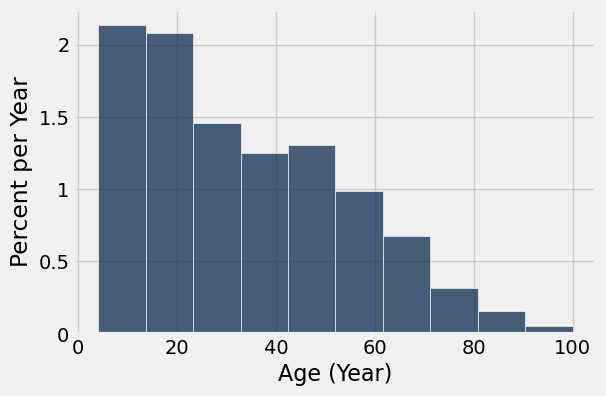

In [33]:
# Not specifying any bins
top_movies.hist('Age', unit='Year')

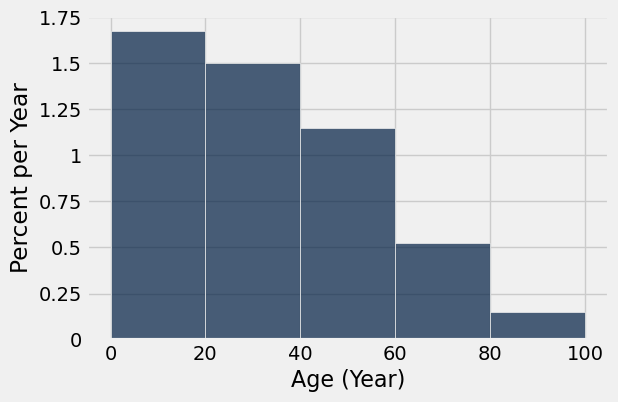

In [34]:
# Equally spaced bins of width 20
top_movies.hist('Age', bins = np.arange(0, 101, 20), unit = 'Year')

In [35]:
# Percent in [20, 40) bin = height * width
...

In [36]:
equal_bins

bin,Age count
0,67
20,60
40,46
60,21
80,6
100,0


In [37]:
# Percent in [20, 40): 60/200
60/200

0.3

## The Vertical Axis ##

In [38]:
my_bins

array([  0,  10,  20,  40,  60, 100])

In [39]:
binned_data

bin,Age count
0,28
10,39
20,60
40,46
60,27
100,0


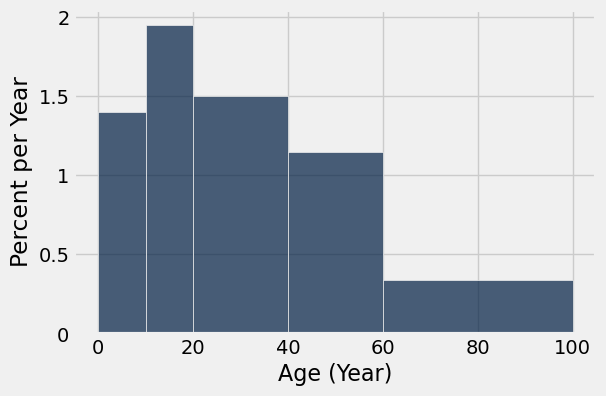

In [40]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

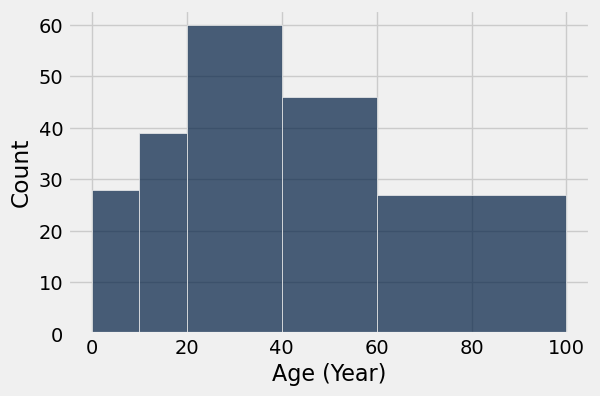

In [51]:
"""Plotting the counts on the vertical axis is a bad idea."""
top_movies.hist('Age', bins = my_bins, unit = 'Year', normed=False)

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [ ]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [ ]:
binned_data

## Finding Height ##

### Height of the [40, 60) bar

In [ ]:
# Height of [40, 60) bar

percent_in_bin = 23
width_of_bin = 60 - 40
height_of_bar = percent_in_bin / width_of_bin
height_of_bar

### Heights of all the bars

In [ ]:
# Get the bin left ends
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))
bin_lefts

In [ ]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts_and_widths = bin_lefts.with_column('Width', bin_widths)
bin_lefts_and_widths

In [ ]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
all_histogram_data = bin_lefts_and_widths.with_column('Height', bin_heights)
all_histogram_data

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')